In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 기초 통계 개념정리

## 1) 대푯값: 데이터의 중심을 나타내는 값
* 평균(mean)
* 중앙값 (median)
* 최빈값(mode)

### (1) 평균(mean) $ \mu $
* 모든 값의 총합을 값의 개수로 나눈 값
* 극단적인 값(이상값/아웃라이어)이 있는 경우 평균에 영향을 미친다.
* 모집단의 평균 $ \mu $
* 표본집단의 평균 $ \bar{x} $
* 모집단과 표본집단의 평균 약간 차이가 나기에 나눠서 쓴다

<br>
$$ 모평균: \mu = {\sum_{i=1}^N x_i \over n} $$
$$ 표본평균: \bar{x} = {\sum_{i=1}^N x_i \over n} $$

In [4]:
# 평균
a = pd.DataFrame([2,3,3,4,4,5,7,7,7,8], columns=['표본'])
a.mean()

표본    5.0
dtype: float64

### (2) 중앙값(median)
* 모든 데이터를 큰 순서대로 나열할 때 가운데 있는 값
* 데이터의 개수가 홀수일 때는 정중앙의 값
* 데이터의 개수가 짝수일 때는 정중앙 2개수의 평균 값
* 이상치가 있어도 영향을 받지 않는다.

In [5]:
a.T

,0,1,2,3,4,5,6,7,8,9
표본,2,3,3,4,4,5,7,7,7,8


In [8]:
b = pd.DataFrame([3,3,4,4,5,7,7,7,8], columns=['표본'])

In [6]:
a.median()

표본    4.5
dtype: float64

In [9]:
b.median()

표본    5.0
dtype: float64

### (3) 최빈값(mode)
* 표본에서 가장 많이 등장하는 값
* 최빈값도 극단값에 영향을 받지 않음
* 

In [10]:
a.mode()

,표본
0,7


### (4) 산술평균/ 기하평균
* 산술평균(덧셈의 평균): 모든 데이터의 합계/ 데이터 수
* 기하평균 (곱셈의 평균) : 모든 데이터의 곱의 n 제곱근 - 증가율의 평균을 계산할 때 사용

In [11]:
#산술평균
print(a.mean())
print("a의 산술평균:", (2+3+3+4+4+5+7+7+7+8)/10)

표본    5.0
dtype: float64
a의 산술평균: 5.0


In [13]:
math.pow((2*3*3*4*4*5*7*7*7*8), 1/10)

4.567459024554638

In [14]:
from scipy.stats import gmean
geometric_mean = gmean(a['표본'])
print("기하평균:", geometric_mean)

기하평균: 4.567459024554637


2020년에 7%, 2021년에 35%, 2022년에 40%, 2023년에 69%의 매출 증가가 있었다면 4년간 평균 매출 증가율은?

In [15]:
print("산술평균:", pd.Series([7,35,40,69]).mean())
print("기하평균:", gmean([7,35,40,69]))

산술평균: 37.75
기하평균: 28.67601451933219


# 2) 도수 분포표와 히스토그램
## (1) 도수분포표
* 주어진 데이터를 일정한 범위로 나누고 그 범위에 추련하는 데이터 개수를 조사해 나타낸 표
* 데이터 구간 폭을 '계급'(class) 각 계급에 속하는 데이터 개수를 '도수'라고 한다.
* 각 계급의 중앙값을 '계급값'이라 한다.
* 도수분포표에서 도수가 큰 것을 '출현 획수가 많다'고 하고
* 가장 도수가 큰 계급의 계급값을 '최빈값'이라고 한다.

In [16]:
#타이타닉 데이터 로딩
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")

In [17]:
# 나이 컬럼만 가져오기
ages =data[['Age']]
ages

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [18]:
ages.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [19]:
#  계급 구간을 10단위로 계급을 나누어 도수분포표 만들고
# 도수분포표를 시각화한 히스토그램 그려보기
bins = (0,10,20,30,40,50,60,70,80,90)
labels =('under10s', '10s','20s','30s','40s','50s','60s','70s','80s')

fdt = pd.cut(ages['Age'].values, bins=bins, labels=labels, right=False)
print(fdt.value_counts())  #age 컬럼의 도수분포표
sns.histplot(ages['Age'],bins=bins)

under10s     62
10s         102
20s         220
30s         167
40s          89
50s          48
60s          19
70s           6
80s           1
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

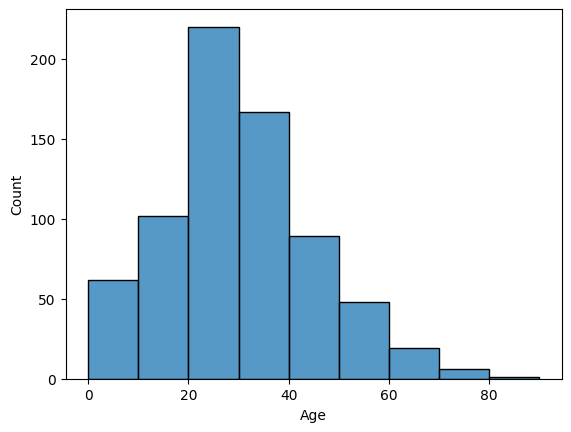

In [20]:
sns.histplot(ages['Age'],bins=bins)

### (2) 상대도수분포표(Relative Freqeuncy Distribution Table)
* 상대도수: 계급의 도수 / 전체 도수의 합계, 어떤 계급의 도수가 전체 도수에서 몇 %를 차지하는지 나타내는 값
* 상대도수분포표 : 모든 계급의 상대도수를 구해서 더한 것

In [21]:
fde_df = pd.DataFrame(fdt.value_counts())
fde_df

,count
under10s,62
10s,102
20s,220
30s,167
40s,89
50s,48
60s,19
70s,6
80s,1


In [22]:
# 상대도수분포표 만들기
# 상대도수: 계급의 도수 / 전체 도수의 합계

In [24]:
fde_df['rfdt']= round(fde_df['count']/fde_df['count'].sum(),3)*100

In [25]:
fde_df

,count,rfdt
under10s,62,8.7
10s,102,14.3
20s,220,30.8
30s,167,23.4
40s,89,12.5
50s,48,6.7
60s,19,2.7
70s,6,0.8
80s,1,0.1


<Axes: xlabel='Age', ylabel='Probability'>

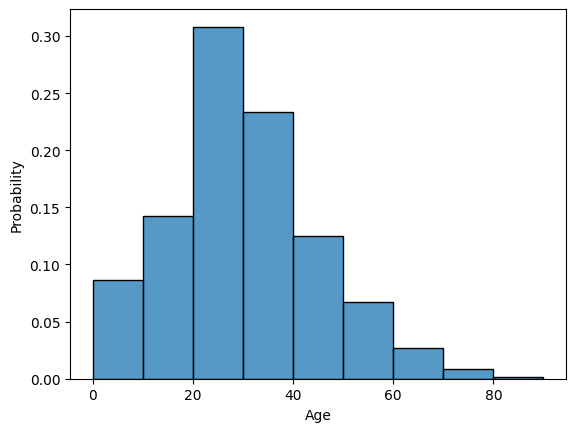

In [27]:
sns.histplot(ages['Age'], bins=bins, stat='probability', kde = False)

### 구간화가 필요한 데이터에서 계급의 개수를 몇개로 해야할지?
* 스터지스 공식: 도수분포표나 히스토그램을 만들 때 계급의 수가 적당한지 판단하는 기준이 되는 공식
* 전체 데이터 개수를 $ 2^n $ 이라 하고, 그때 계급 수를 $ n+1 $ 한다.

$ 2^n $ 

In [28]:
len(ages['Age'])

891

In [30]:
# 891은 2의 몇슨? =n, n+1
n= math.log(891,2)
print(round(n+1))

11


## 3) 편차(deviation)
* 데이터와 평균이 떨어진거리, 데이터와 평균 값 과의 차이
* 데이터 - 평균값

In [33]:
a['평균']=a['표본'].mean()
a

,표본,평균
0,2,5.0
1,3,5.0
2,3,5.0
3,4,5.0
4,4,5.0
5,5,5.0
6,7,5.0
7,7,5.0
8,7,5.0
9,8,5.0


In [34]:
a['편차']=a['표본'] -a['평균']
a

,표본,평균,편차
0,2,5.0,-3.0
1,3,5.0,-2.0
2,3,5.0,-2.0
3,4,5.0,-1.0
4,4,5.0,-1.0
5,5,5.0,0.0
6,7,5.0,2.0
7,7,5.0,2.0
8,7,5.0,2.0
9,8,5.0,3.0


## 4) 분산(variance): 편차 제곱의 합 / 데이터수
* 모분산: $ \sigma^2 $  <br>
$ \sigma^2 ={\sum(x_i - \mu)^2 \over N} $
### 편차 제곱의 합 / (데이터수-1)
* 표본분산: $ s^2 $  <br>
$ s^2 ={\sum(x_i - \bar{x})^2 \over n-1} $

In [35]:
# 분산: 편차제곱의 합 / 데이터 수
(a['편차']**2).sum()

40.0

In [36]:
a['편차제곱']=a['편차']**2

In [37]:
a['분산'] = a['편차제곱'].sum() / len(a['편차제곱'])
a

,표본,평균,편차,편차제곱,분산
0,2,5.0,-3.0,9.0,4.0
1,3,5.0,-2.0,4.0,4.0
2,3,5.0,-2.0,4.0,4.0
3,4,5.0,-1.0,1.0,4.0
4,4,5.0,-1.0,1.0,4.0
5,5,5.0,0.0,0.0,4.0
6,7,5.0,2.0,4.0,4.0
7,7,5.0,2.0,4.0,4.0
8,7,5.0,2.0,4.0,4.0
9,8,5.0,3.0,9.0,4.0


In [38]:
# 분산함수 .var() :표본분산을 구해주는 함수
a['표본'].var()

4.444444444444445

-> var함수는 표본분산을 구해주는 함수이다


In [41]:
a['표본분산'] = a['편차제곱'].sum() / (len(a['편차제곱'])-1)
a

,표본,평균,편차,편차제곱,분산,표본분산
0,2,5.0,-3.0,9.0,4.0,4.444444
1,3,5.0,-2.0,4.0,4.0,4.444444
2,3,5.0,-2.0,4.0,4.0,4.444444
3,4,5.0,-1.0,1.0,4.0,4.444444
4,4,5.0,-1.0,1.0,4.0,4.444444
5,5,5.0,0.0,0.0,4.0,4.444444
6,7,5.0,2.0,4.0,4.0,4.444444
7,7,5.0,2.0,4.0,4.0,4.444444
8,7,5.0,2.0,4.0,4.0,4.444444
9,8,5.0,3.0,9.0,4.0,4.444444


## 5) 표준편차(standard diviation): 분산의 제곱근
* 모집단의 표준편차 $ \sigma $ <br>
$ \sigma =\sqrt{\sum(x_i - \mu)^2 \over N} $
<br><br>

* 표본집단의 표준편차 $ s $ <br>
$ s =\sqrt {\sum(x_i - \bar{x})^2 \over n-1} $

In [42]:
a['표준편차'] =a['분산'].apply(math.sqrt)
a

,표본,평균,편차,편차제곱,분산,표본분산,표준편차
0,2,5.0,-3.0,9.0,4.0,4.444444,2.0
1,3,5.0,-2.0,4.0,4.0,4.444444,2.0
2,3,5.0,-2.0,4.0,4.0,4.444444,2.0
3,4,5.0,-1.0,1.0,4.0,4.444444,2.0
4,4,5.0,-1.0,1.0,4.0,4.444444,2.0
5,5,5.0,0.0,0.0,4.0,4.444444,2.0
6,7,5.0,2.0,4.0,4.0,4.444444,2.0
7,7,5.0,2.0,4.0,4.0,4.444444,2.0
8,7,5.0,2.0,4.0,4.0,4.444444,2.0
9,8,5.0,3.0,9.0,4.0,4.444444,2.0


In [43]:
# 표준편차를 구하는 함수 .std() 표본의 표준편차
a['표본'].std()

2.1081851067789197

In [45]:
a['표본표준편차']= a['표본분산'].apply(math.sqrt)
a

,표본,평균,편차,편차제곱,분산,표본분산,표준편차,표본표준편차
0,2,5.0,-3.0,9.0,4.0,4.444444,2.0,2.108185
1,3,5.0,-2.0,4.0,4.0,4.444444,2.0,2.108185
2,3,5.0,-2.0,4.0,4.0,4.444444,2.0,2.108185
3,4,5.0,-1.0,1.0,4.0,4.444444,2.0,2.108185
4,4,5.0,-1.0,1.0,4.0,4.444444,2.0,2.108185
5,5,5.0,0.0,0.0,4.0,4.444444,2.0,2.108185
6,7,5.0,2.0,4.0,4.0,4.444444,2.0,2.108185
7,7,5.0,2.0,4.0,4.0,4.444444,2.0,2.108185
8,7,5.0,2.0,4.0,4.0,4.444444,2.0,2.108185
9,8,5.0,3.0,9.0,4.0,4.444444,2.0,2.108185


In [46]:
a['표본'].describe()

count    10.000000
mean      5.000000
std       2.108185
min       2.000000
25%       3.250000
50%       4.500000
75%       7.000000
max       8.000000
Name: 표본, dtype: float64

## 6) 표준점수(standard score), z-점수(z-score)
* 데이터 포인트(값)가 평균으로부터 얼마나 떨어져 있는지를 나타내는 지표
* 이는 데이터 포인트가 평균에서 몇 표준편차 떨어져 있는지를 나타내며,
* 데이터의 상대적인 위치를 이해하는데 유용하다

* 모집단 표준점수(Z-score) z <br>
$ Z= {x_i - \mu \over \sigma} $  <br><br><br>

* 표본집단의 표준점수( Z-score) z <br>
$ Z= {x_i - \bar {x} \over s} $  <br><br><br>

뮤가나오지않고 엑스바가나온다면? 분모도 s 이겠구나


# 자유도(degrees of freedom)란?
* 데이터의 독립적인 정보의 수
* [2,3,4,5,6]의 평균?
* 통계는 표본을 추출해서 계산
* 모평균 4.0
* 표본평균 4.0
* 평균값을 유지하기 위해서 마지막 데이터 포인트는 고정되어야 하고
* 고정된 포인트 이외의 값들은 자유롭게 변할 수 있다.
* 그래서 n-1개가 된다(표본을 n-1로 나누는이유 = 평균을 맞추기 위해서)

In [47]:
pd.Series([2,3,4,5,6]).mean()

4.0

In [49]:
# [2,3,4,5,6] 전체 = 모집단
(2+3+4+5+6) / 5

4.0

In [50]:
# 펴본 [4,2,5,7,x] 의 평균 =4.0

In [51]:
sum([4,2,5,7,2]) / 5

4.0

모평균과 표본의 평균을 같게 하기위해서는 뒤에 한자리가 비어있어야하기에 n-1로 하는 것!

# 가설검정 t-test
* t-test는 두 집단의 평균을 비교하여 차이가 있는지 확인하는 통계적 방법

### 1) 일 표본 단측 t-검정(한쪽으로 방향성을 갖는 경우)
* 모수에 대한 검정을 할때 모수 값이 ~보다 크다, 혹은 ~보다 작다와 같이 한쪽으로의 방향성을 갖는 경우 수행되는

In [52]:
! pip install statsmodels

In [54]:
import statsmodels.stats.weightstats as stests
from scipy import stats

In [57]:
# 일 표본 단측 t-검정을 위해 지우개 10개의 표본 추출
weights = np.random.uniform(49, 52,10)
print(weights)
print("지우개의 평균: ", weights.mean())

[50.27268954 50.7111849  49.33966018 50.63904882 51.79105138 51.03601031
 49.20619973 50.00532647 50.09079655 50.41205536]
지우개의 평균:  50.35040232460874


In [62]:
# 일 표본 단측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 50, alternative='greater')
print(f"T-통계량: {t_stat}, P-value: {p_value}")

T-통계량: 1.4458381584053646, P-value: 0.09106491623661254


* p-value가 0.05보다 큰지 작은지 확인해서 기각유무 결정

### 2) 일 표본 양측 t-test(방향성이 없는 경우)
* 단측 검정과 달리 모수 값이 ~이다,. ~이 아니다와 같이 방향성이 없는 경우 수행되는 검정 방법ㅂ
* 대한민국 남성의 평균 몸무게는 70kg이다(귀무가설)
* 대한민국 남성의 평균 몸무게는 70kg이 나니다(대립가설)

In [67]:
# 일 표본 양측 t-test를 위한 40kg~100kg 사이 남성 100명의 표본을 추출
weights = np.random.uniform(40, 100, 100)
print(len(weights))
print("몸무게 평균", round(weights.mean()))

100
몸무게 평균 70


In [68]:
# 일 표본 양측 t-test
t_stat, p_value = stats.ttest_1samp(weights, 70, alternative ='two-sided')
print(f"T-통계량: {t_stat}, P-value: {p_value}")

T-통계량: 0.17554714063179747, P-value: 0.861008292088111


* Pvalue가 0.05보다 작으면 귀무가설기각! 대립가설 채택!

### 3) 이 표본 t-test(independent sample t-test)
* 서로 독립적인 두개의 집단에 대하여 모수(모평균)의 값이 같은 값을 갖는지 통계적으로 검정하는 방법
* 여기서 독립이란 두 모집단에서 각각 추출된 두 표본이 서로 관계가 없다는 것을 의미
* 두 모집단의 분산이 같음을 의미하는 등분산성을 만족해야 한다
* 따라서 이 표본 t검정을 수행하기 전에 등분산 검정(F검정)을 먼저 수행해야 한다


### 4) 이 표본 단측 t검정 (~보다 크다 / 작다)
* 두 집단에 대해서 모수 비교를 할 때 A가 B보다 크다/작다 를 비교하는 검정
* A회사의 급여가 B회사의 급여보다 같거나 많다 (귀무가설)
* 

In [69]:
# 랜덤하게 급여 생성 salaryA 250~380사이 값 100개, salary B 200~400사이의값 100개
salaryA = np.random.uniform(250, 380, 100)
salaryB = np.random.uniform(200, 400, 100)
print("salaryA의 평균", salaryA.mean())
print("salaryB의 평균", salaryB.mean())

t_stat, p_value =stats.ttest_ind(salaryA, salaryB, alternative='less')

print(f"T-통계량: {t_stat}, P-value: {p_value}")

salaryA의 평균 312.01699269984687
salaryB의 평균 301.4880832638586
T-통계량: 1.5981926777374091, P-value: 0.9442026545488634


### 5) 이 표본 양측 t검정(A는 B와 같다/다르다)
* K와 L의 달리기 속도는 같다(귀무가설)
* 

In [71]:
# 랜덤한 속도 생성(speedk :30에서 40사이의 값 100개, speedL은 25에서 35 사이의 값 100개)
speedk= np.random.uniform(30,40,100)
speedL= np.random.uniform(25,35,100)

t_stat, p_value =stats.ttest_ind(speedk, speedL)

print(f"T-통계량: {t_stat}, P-value: {p_value}")

T-통계량: 10.934670801216983, P-value: 4.464728751046865e-22


### 6) 대응 표본 t 검정(paired t-test) A/B test
* 실험 전후 비교
* 동일한 대상에 대해 두가지 관측

In [72]:
# 대응 표본 t검정을 위한 표본 추출
before=np.random.uniform(60,80,100)
after = before+ np.random.normal(-3,2,100)

#대응표본 t검정
t_stat, p_value =stats.ttest_ind(before, after, alternative='greater')
print(f"T-통계량: {t_stat}, P-value: {p_value}")

T-통계량: 3.4936892947654954, P-value: 0.00029382420193707333


# 분산분석(ANOVA)
* 3개 이상의 모집단이 있을 경우 집단 사이의 평균을 비교
* 분산분석의 귀무가설($ H_0 $) "모든 집단 간 평균은 같다" 이다.
* 분산분석을 수행하기 위해서는 아래의 세 가지 가정 사항을 필요로 한다
   * 정규성: 각 집단의 표본들은 정규분포를 따라야 한다
   * 등분산성: 각 집단은 동일한 분산을 가져야 한다
   * 독립성: 각 집단은 서로에게 영향을 주지 않는다
* 2) 분산분석
   * 분산분석의 독립변수는 범주형 데이터여야 하고, 종속변수는 연속형이어야 한다
   * 분산분석에는 '(집단 감 분산)/(집단 내 분산)'으로 계산되는 F-value가 사용된다.
   * F-value가 커지면 p-value가 작아진다
   * 평균을 비교하는 분산분석에 분산의 개념을 사용하는 이유는 집단 간 평균의 분산이 클 수록 각 집단의 평균은 서로 멀리 떨어져 있기 때문에 집단 간 차이를 비교하기 쉬워진다

### 1) 일월분산분석(one-way Anova)
* 셋 이상의 집단 간 평균을 비교하는 상황에서 하나의 집단에 속하는 독립변수와 종속변수가 모두 한 개 일 때 사용
* 예) 연령 대 별 (청소년, 성인, 노인) 유튜브 시청 시간의 차이
   * 독립변수는 연령별 집단(청소년, 성인, 노인), 종속변수(유튜브 시청시간)
   * 셋 이상의 집단이지만 독립변수는 '연령별 집단'하나